<a href="https://colab.research.google.com/github/Tanmaymandalay/Python-for-DS/blob/main/Decision_Tree_C5_0_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [10]:
# import some data to play with
iris = pd.read_csv('Iris.csv',index_col=0)

In [11]:
iris.head()

,sepal width,petal length,petal width,iris
sepal length,,,,
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['iris']= label_encoder.fit_transform(iris['iris']) 

In [13]:
x=iris.iloc[:,0:4]
y=iris['iris']

In [14]:
x

,sepal width,petal length,petal width,iris
sepal length,,,,
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
...,...,...,...,...
6.7,3.0,5.2,2.3,2
6.3,2.5,5.0,1.9,2
6.5,3.0,5.2,2.0,2


In [15]:
y

sepal length
5.1    0
4.9    0
4.7    0
4.6    0
5.0    0
      ..
6.7    2
6.3    2
6.5    2
6.2    2
5.9    2
Name: iris, Length: 150, dtype: int64

In [16]:
iris['iris'].unique()

array([0, 1, 2])

In [18]:
iris.iris.value_counts()

2    50
1    50
0    50
Name: iris, dtype: int64

In [19]:
colnames = list(iris.columns)
colnames

['sepal width', 'petal length', 'petal width', 'iris']

In [45]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

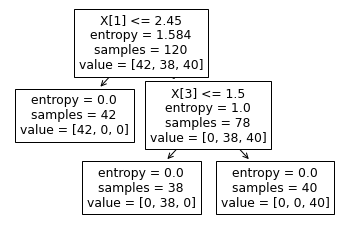

In [22]:
#PLot the decision tree
tree.plot_tree(model);


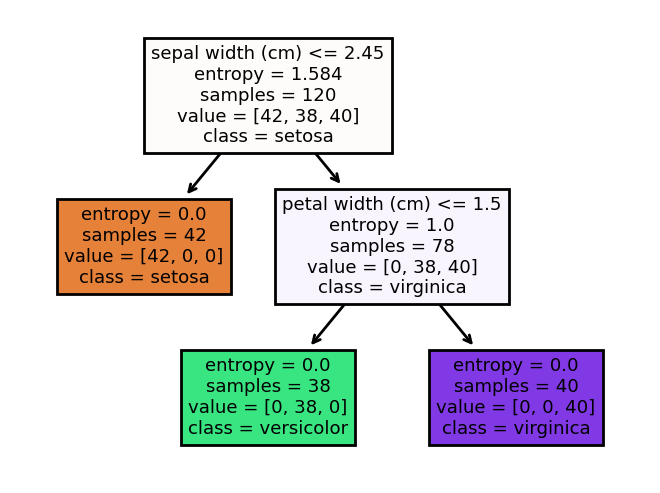

In [28]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [50]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1.0    12
2.0    10
0.0     8
dtype: int64

In [44]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [30]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
iris,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [31]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [47]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

#### Decision Tree Regression Example

In [52]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [53]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [55]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
#Find the accuracy
model.score(X_test,y_test)

0.9351070733290071